In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import matplotlib.image as mpimg



In [4]:
dfsujo = pd.read_csv('C:/projeto1/analise_exploratoria/data/celular2025.csv', encoding='ISO-8859-1')


In [5]:
dfsujo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

Limpeza do dataset

In [19]:
# 1. Ajustar nomes das colunas
colunas_numericas = ["Mobile Weight", "RAM", "Front Camera", "Back Camera", "Battery Capacity", "Screen Size"]
colunas_precos = ["Launched Price (Pakistan)", "Launched Price (India)", 
                  "Launched Price (China)", "Launched Price (USA)", "Launched Price (Dubai)"]

for col in colunas_numericas:
    dfsujo[col] = dfsujo[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)  
    dfsujo[col] = dfsujo[col].apply(lambda x: x if x.count('.') <= 1 else x.replace('.', '', x.count('.') - 1))
    dfsujo[col] = pd.to_numeric(dfsujo[col], errors='coerce')

for col in colunas_precos:
    dfsujo[col] = dfsujo[col].replace("", pd.NA)  
    dfsujo[col] = dfsujo[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)  
    dfsujo[col] = pd.to_numeric(dfsujo[col], errors='coerce')

# 2. Criar nova coluna de preço médio
dfsujo["avg_price"] = dfsujo[colunas_precos].mean(axis=1)

# 3. Substituir valores NaN por 0
dfsujo.fillna(0, inplace=True)

# 4. Remover o outlier identificado (Nokia T21 com preço 39622.0)
dfsujo = dfsujo[dfsujo["Model Name"] != "T21"]

# 5. Salvar dataset limpo
dfsujo.to_csv('C:/projeto1/analise_exploratoria/data/celular2025_clean.csv', index=False)


C:\Users\leand\AppData\Local\Temp\ipykernel_8564\1639466778.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsujo[col] = dfsujo[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
C:\Users\leand\AppData\Local\Temp\ipykernel_8564\1639466778.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsujo[col] = dfsujo[col].apply(lambda x: x if x.count('.') <= 1 else x.replace('.', '', x.count('.') - 1))
C:\Users\leand\AppData\Local\Temp\ipykernel_8564\1639466778.py:9: SettingWithCopyWarning: 
A value is 

In [17]:
print(dfsujo.columns)


Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')


In [20]:
df = pd.read_csv('C:/projeto1/analise_exploratoria/data/celular2025_clean.csv')

In [21]:
df.info

<bound method DataFrame.info of     Company Name            Model Name  Mobile Weight   RAM  Front Camera  \
0          Apple       iPhone 16 128GB          174.0   6.0          12.0   
1          Apple       iPhone 16 256GB          174.0   6.0          12.0   
2          Apple       iPhone 16 512GB          174.0   6.0          12.0   
3          Apple  iPhone 16 Plus 128GB          203.0   6.0          12.0   
4          Apple  iPhone 16 Plus 256GB          203.0   6.0          12.0   
..           ...                   ...            ...   ...           ...   
924         Poco          Pad 5G 128GB          571.0   8.0           8.0   
925         Poco          Pad 5G 256GB          571.0   8.0           8.0   
926      Samsung  Galaxy Z Fold6 256GB          239.0  12.0         104.0   
927      Samsung  Galaxy Z Fold6 512GB          239.0  12.0         104.0   
928      Samsung    Galaxy Z Fold6 1TB          239.0  12.0         104.0   

     Back Camera            Processor  Batt

In [22]:
df.describe()

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,avg_price
count,929.000000,929.000000,929.000000,9.290000e+02,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000
mean,228.011195,9.519914,28.755221,3.726444e+04,5022.747040,9.971507,125380.089343,50611.885899,3824.198062,583.538924,2185.347686,2022.193757,36517.011983
std,105.199923,37.429609,74.177966,2.524832e+05,1352.266507,44.000080,101648.336873,40968.271993,2766.277630,421.189917,1565.880407,1.863072,28769.175650
min,135.000000,1.000000,2.000000,5.000000e+00,2000.000000,5.000000,0.000000,5999.000000,499.000000,79.000000,299.000000,2014.000000,4575.000000
25%,185.000000,6.000000,8.000000,5.000000e+01,4400.000000,6.500000,54999.000000,19999.000000,1700.000000,250.000000,1000.000000,2021.000000,15435.000000
50%,194.000000,8.000000,16.000000,6.400000e+01,5000.000000,6.670000,85000.000000,34999.000000,2800.000000,449.000000,1675.000000,2023.000000,25479.000000
75%,208.000000,8.000000,32.000000,1.216000e+03,5065.000000,6.780000,179999.000000,74900.000000,5499.000000,849.000000,3199.000000,2024.000000,52259.000000
max,732.000000,812.000000,1212.000000,5.016132e+06,11200.000000,694.000000,604999.000000,274999.000000,17999.000000,2799.000000,11099.000000,2025.000000,158619.000000


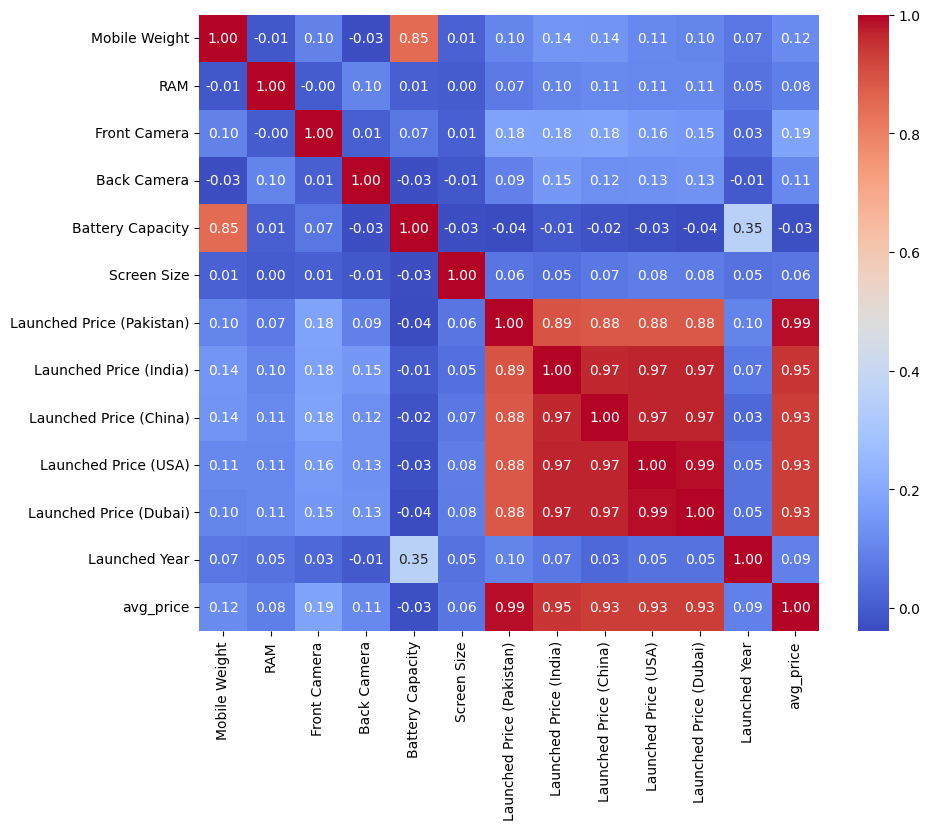

In [23]:
# Selecionando apenas colunas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

corr = df_numerico.corr()

# Exibindo a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

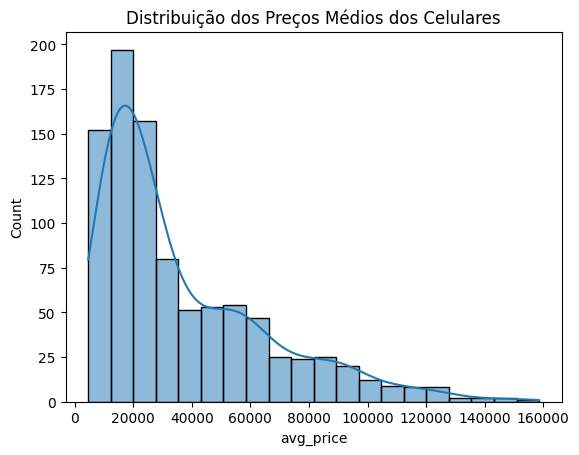

In [24]:
sns.histplot(df['avg_price'], bins=20, kde=True)
plt.title('Distribuição dos Preços Médios dos Celulares')
plt.show()

In [25]:
sns.boxplot(x='company', y='avg_price', data=df)
plt.xticks(rotation=45)
plt.title('Preço Médio por Marca')
plt.show()


ValueError: Could not interpret value `company` for `x`. An entry with this name does not appear in `data`.

In [26]:
# Detecção de outliers
sns.boxplot(df['price_usa'])
plt.title('Detecção de Outliers nos Preços (USA)')
plt.show()


KeyError: 'price_usa'

In [14]:
# Calculando o Z-score
df['z_score'] = stats.zscore(df['price_usa'])

# Filtrando os possíveis outliers
outliers = df[df['z_score'].abs() > 3]
print(outliers[['price_usa']])  # Exibir os possíveis outliers


     price_usa
685    39622.0


In [15]:
# Filtrar o celular com o preço discrepante nos EUA
outlier_celular = df[df['price_usa'] == 39622.0]

# Exibir as colunas relevantes para análise
print(outlier_celular[['company', 'model', 'price_usa']])


    company model  price_usa
685   Nokia   T21    39622.0


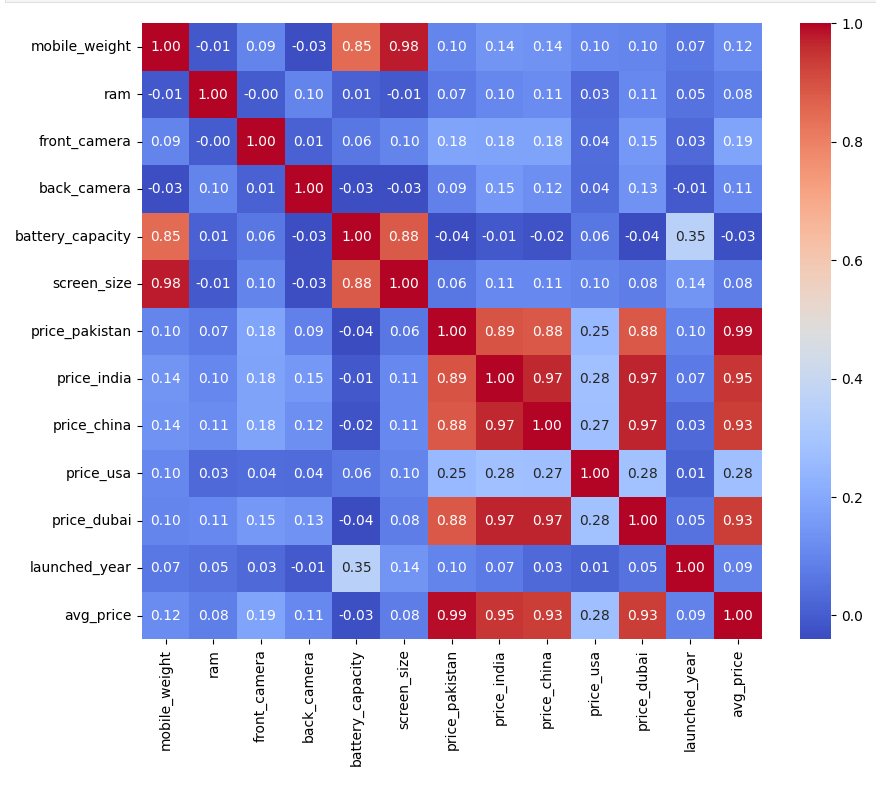